In [1]:
from fbprophet import Prophet
import pandas as pd

AK_47 = pd.read_csv('AK_47 Google Trends.csv', parse_dates =['period'])

In [2]:
AK_47.head()

,Unnamed: 0,date,value,period,onediffvalue
0,0,Oct 07 2013,471.015451,2013-10-07,NaN
1,1,Oct 08 2013,577.625911,2013-10-08,106.610460
2,2,Oct 09 2013,531.346672,2013-10-09,-46.279239
3,3,Oct 10 2013,405.706574,2013-10-10,-125.640097
4,4,Oct 11 2013,522.827567,2013-10-11,117.120992


In [3]:
prophetdataframe = pd.DataFrame()

In [4]:
prophetdataframe['ds'] = AK_47['period']
prophetdataframe['y'] = AK_47['value']

In [5]:
prophetdataframe.head()

,ds,y
0,2013-10-07,471.015451
1,2013-10-08,577.625911
2,2013-10-09,531.346672
3,2013-10-10,405.706574
4,2013-10-11,522.827567


In [6]:
m = Prophet()

In [7]:
m.fit(prophetdataframe)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = m.make_future_dataframe(periods=365) # Create prediction model

In [9]:
future.tail()

,ds
2181,2019-09-27
2182,2019-09-28
2183,2019-09-29
2184,2019-09-30
2185,2019-10-01


In [10]:
forecast = m.predict(future) # Create prediction model variable

In [11]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2181,2019-09-27,416.328520,236.024964,514.186387,393.356007,439.758698,-48.595776,-48.595776,-48.595776,-17.920215,-17.920215,-17.920215,-30.675561,-30.675561,-30.675561,0.0,0.0,0.0,367.732744
2182,2019-09-28,416.180805,325.220256,606.994016,393.100937,439.760248,46.637504,46.637504,46.637504,70.382497,70.382497,70.382497,-23.744993,-23.744993,-23.744993,0.0,0.0,0.0,462.818309
2183,2019-09-29,416.033090,348.689508,627.228513,392.861286,439.710514,69.738123,69.738123,69.738123,86.841904,86.841904,86.841904,-17.103781,-17.103781,-17.103781,0.0,0.0,0.0,485.771213
2184,2019-09-30,415.885375,233.151780,524.885273,392.642275,439.658621,-39.913875,-39.913875,-39.913875,-29.017812,-29.017812,-29.017812,-10.896063,-10.896063,-10.896063,0.0,0.0,0.0,375.971500
2185,2019-10-01,415.737660,236.065461,521.203667,392.423263,439.604605,-40.399950,-40.399950,-40.399950,-35.142314,-35.142314,-35.142314,-5.257636,-5.257636,-5.257636,0.0,0.0,0.0,375.337709


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


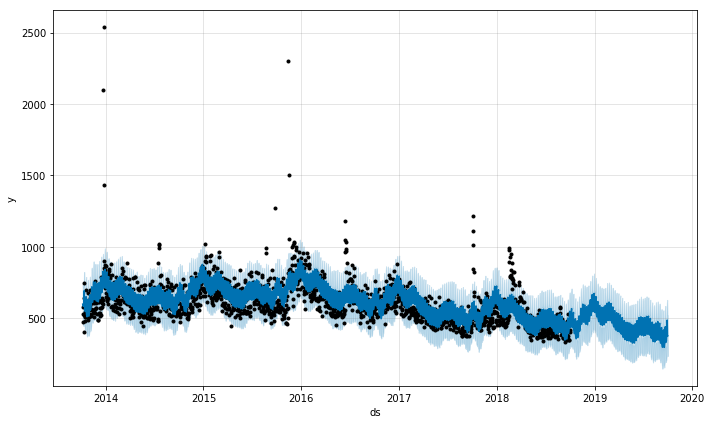

In [12]:
fig1 = m.plot(forecast)

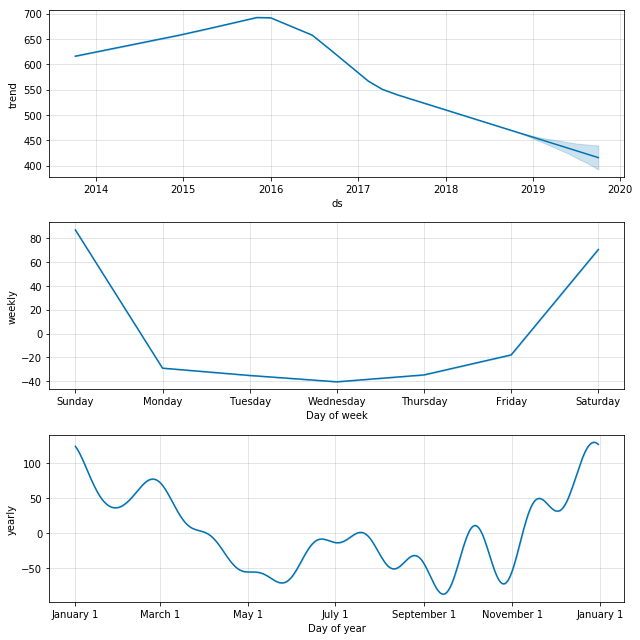

In [13]:
fig2 = m.plot_components(forecast)

In [14]:
erroranalysis = m.predict(prophetdataframe)

In [15]:
erroranalysis['value'] = prophetdataframe['y']
erroranalysis['residuals'] = erroranalysis['value'] - erroranalysis['yhat']
erroranalysis['absoluteresiduals'] = abs(erroranalysis['residuals'])

erroranalysis.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,...,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,value,residuals,absoluteresiduals
0,2013-10-07,616.087860,467.477874,740.294607,616.087860,616.087860,-18.434868,-18.434868,-18.434868,-29.017812,...,10.582945,10.582945,10.582945,0.0,0.0,0.0,597.652992,471.015451,-126.637542,126.637542
1,2013-10-08,616.182799,456.174544,722.415652,616.182799,616.182799,-25.886395,-25.886395,-25.886395,-35.142314,...,9.255919,9.255919,9.255919,0.0,0.0,0.0,590.296404,577.625911,-12.670493,12.670493
2,2013-10-09,616.277738,453.151773,736.476486,616.277738,616.277738,-33.529046,-33.529046,-33.529046,-40.459419,...,6.930373,6.930373,6.930373,0.0,0.0,0.0,582.748692,531.346672,-51.402020,51.402020
3,2013-10-10,616.372677,444.617315,733.348992,616.372677,616.372677,-31.019663,-31.019663,-31.019663,-34.684640,...,3.664977,3.664977,3.664977,0.0,0.0,0.0,585.353014,405.706574,-179.646439,179.646439
4,2013-10-11,616.467616,469.124692,739.813584,616.467616,616.467616,-18.379406,-18.379406,-18.379406,-17.920215,...,-0.459191,-0.459191,-0.459191,0.0,0.0,0.0,598.088209,522.827567,-75.260642,75.260642


In [16]:
totalerror = erroranalysis['absoluteresiduals'].sum()

In [17]:
print(totalerror)

108045.77263273275


In [18]:
print(totalerror/len(erroranalysis)) # Average residual per day

59.33320847486697


In [19]:
erroranalysis['value'].describe()

count    1821.000000
mean      605.619002
std       149.483889
min       330.242337
25%       515.510679
50%       586.315901
75%       677.073792
max      2539.383193
Name: value, dtype: float64